# 1. Imports:
1. Pandas
2. Numpy
3. Matplotlib
4. seaborn

In [20]:
import pandas as pd
print("pandas: " + pd.__version__)
import numpy as np
print("numpy:" + np.__version__)
import matplotlib.pyplot as plt
print("matplotlib: " + np.__version__)
import seaborn as sns
print("seaborn: " + sns.__version__)

print("All libraries imported!")
# Plots direkt im Notebook anzeigen
%matplotlib inline

pandas: 2.2.3
numpy:2.1.3
matplotlib: 2.1.3
seaborn: 0.13.2
All libraries imported!


Loading Data:

In [21]:
# Pfad zum Datensatz
data_path = "../data/raw/cardio_train.csv"
df = pd.read_csv(data_path, sep=";")
print("data is loaded")

data is loaded


---
# Data Exploration:
## head, info and columns

In [22]:
# first look on data:
print("-----------------------------------------------------------")
print("head:")
print(df.head()) # showes all columns with the first 5 (0-4) data sets
print("-----------------------------------------------------------")
print()
print("-----------------------------------------------------------")
print("/ln info:")# Shows the first 5 rows
print(df.info())         # Shows columns, types, and missing values
print("-----------------------------------------------------------")
print()
print("-----------------------------------------------------------")
print(df.columns)
print("-----------------------------------------------------------")

-----------------------------------------------------------
head:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
-----------------------------------------------------------

-----------------------------------------------------------
/ln info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------    


### **Cardiovascular Disease Dataset — Feature Overview**

| **Feature Name**                   | **Category**           | **Column Name** | **Data Type / Values**                  | **Description**                                |
|------------------------------------|------------------------|-----------------|------------------------------------------|------------------------------------------------|
| Age                               | Objective Feature      | `age`           | int (days)                              | Patient age (in days)                          |
| Height                            | Objective Feature      | `height`        | int (cm)                                | Patient height (centimeters)                   |
| Weight                            | Objective Feature      | `weight`        | float (kg)                              | Patient weight (kilograms)                     |
| Gender                            | Objective Feature      | `gender`        | categorical code                        | 1: woman, 2: man                               |
| Systolic blood pressure           | Examination Feature    | `ap_hi`         | int                                     | Systolic blood pressure (mm Hg)                |
| Diastolic blood pressure          | Examination Feature    | `ap_lo`         | int                                     | Diastolic blood pressure (mm Hg)               |
| Cholesterol                       | Examination Feature    | `cholesterol`   | 1: normal, 2: above normal, 3: well above normal | Cholesterol level                     |
| Glucose                           | Examination Feature    | `gluc`          | 1: normal, 2: above normal, 3: well above normal | Glucose level                         |
| Smoking                           | Subjective Feature     | `smoke`         | binary (0: no, 1: yes)                  | Whether patient smokes or not                  |
| Alcohol intake                    | Subjective Feature     | `alco`          | binary (0: no, 1: yes)                  | Whether patient consumes alcohol               |
| Physical activity                 | Subjective Feature     | `active`        | binary (0: no, 1: yes)                  | Whether patient is physically active           |
| Cardiovascular disease (target)   | Target Variable        | `cardio`        | binary (0: no, 1: yes)                  | Presence (1) or absence (0) of disease         |

### **Value Encoding Notes**
- **`cholesterol` & `gluc`:**
  - 1 = normal
  - 2 = above normal
  - 3 = well above normal
- **`gender`:**
  - 1 = woman
  - 2 = man
- **`smoke`, `alco`, `active`, `cardio`:**
  - 0 = no
  - 1 = yes

---
## Describe:

In [23]:
print("-----------------------------------------------------------")
print("describe:")
print(df.describe())     # Basic statistics
print("-----------------------------------------------------------")

-----------------------------------------------------------
describe:
                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.22645

### `df.describe()` Output — Statistic Meaning Table Expination:

| **Statistic** | **Meaning**                                                                                                  |
|---------------|-------------------------------------------------------------------------------------------------------------|
| count         | Number of non-missing (non-NaN) entries per column (should be 70,000 for a complete dataset)                |
| mean          | Average value                                                                                               |
| std           | Standard deviation (spread/variability)                                                                     |
| min           | Minimum value found                                                                                         |
| 25%           | 25th percentile (lower quartile) — 25% of values are below this                                             |
| 50%           | Median (50th percentile) — half the values are below, half above                                            |
| 75%           | 75th percentile (upper quartile) — 75% of values are below this                                             |
| max           | Maximum value found                                                                                         |

#### Analysis:
#### Example Interpretation of `df.describe()` Output

##### **1. `id`**
- **Range:** 0 to 99,999 (but only 70,000 rows in the dataset).
- **Usage:** Just a row identifier; not relevant for analysis.

##### **2. `age`**
- **Mean:** 19,469 days (~53.3 years).
- **Min:** 10,798 days (~29.6 years).
- **Max:** 23,713 days (~64.9 years).
- **Distribution:** Most values (middle 50%) are between ~48 and ~58 years.
- **Action:** Age is in days—convert to years for easier interpretation.

##### **3. `gender`**
- **Values:** 1 or 2 (likely 1=woman, 2=man).
- **Distribution:** Median and quartiles show about half are coded as 1, half as 2.
- **Action:** Double-check the dataset documentation for the exact meaning of codes.

##### **4. `height`**
- **Mean:** 164.4 cm.
- **Min:** 55 cm (unrealistically low—likely an error).
- **Max:** 250 cm (unrealistically high—likely an error).
- **Distribution:** Median 165 cm, standard deviation 8.2 cm.
- **Action:** Check and possibly remove or fix extreme outlier values.

##### **5. `weight`**
- **Mean:** 74.2 kg.
- **Min:** 10 kg (very low, likely a data entry error).
- **Max:** 200 kg (high but possible).
- **Distribution:** Median 72 kg, standard deviation 14.4 kg.
- **Action:** Consider filtering out unrealistic values (e.g., <30 kg).

##### **General Notes**
- **All columns have 70,000 entries:** No missing values detected.
- **Watch for outliers:** `height` and `weight` have minimum values that are not realistic for adults.
- **Next steps:** Convert age to years, clean outliers in height and weight, continue with data exploration and visualization.

---
# Essential Graphs for EDA (Exploratory Data Analysis)

## 1. Age Distribution (in Years)

<Figure size 800x400 with 0 Axes>

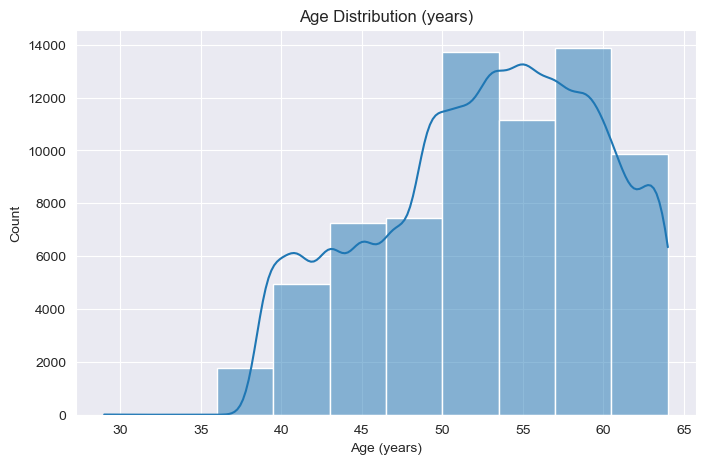

In [24]:
# Convert age from days to years
df['age_years'] = (df['age'] / 365).astype(int)
# age in years instead of age in days
df = df.drop(columns=['age'])

plt.figure(figsize=(8,5))
sns.histplot(df['age_years'], bins=10, kde=True)
plt.title('Age Distribution (years)')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

---
## 2. Height and Weight Distributions

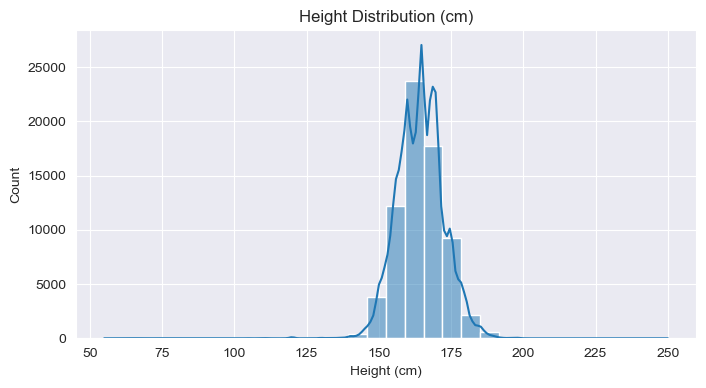

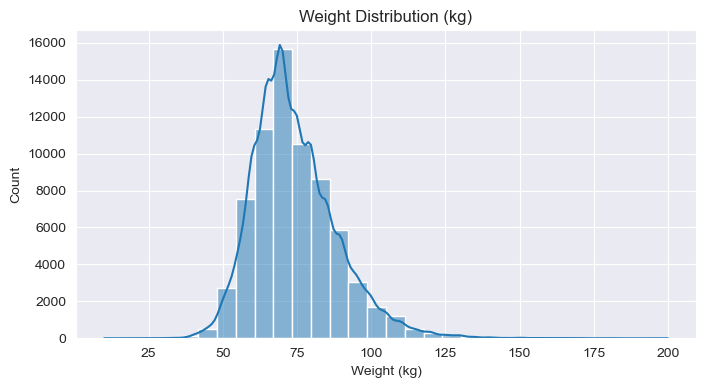

In [25]:
# Height
plt.figure(figsize=(8,4))
sns.histplot(df['height'], bins=30, kde=True)
plt.title('Height Distribution (cm)')
plt.xlabel('Height (cm)')
plt.ylabel('Count')
plt.show()

# Weight
plt.figure(figsize=(8,4))
sns.histplot(df['weight'], bins=30, kde=True)
plt.title('Weight Distribution (kg)')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.show()

---
## 3. Gender Distribution

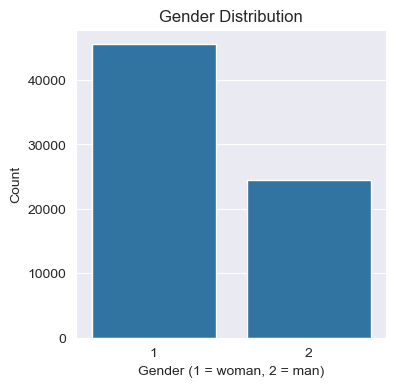

gender
1    0.650429
2    0.349571
Name: proportion, dtype: float64

In [26]:
plt.figure(figsize=(4,4))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender (1 = woman, 2 = man)')
plt.ylabel('Count')
plt.show()
df['gender'].value_counts()
df['gender'].value_counts(normalize=True)  # Shows percentages

---
## 4. Correlation Heatmap (All Numeric Features)

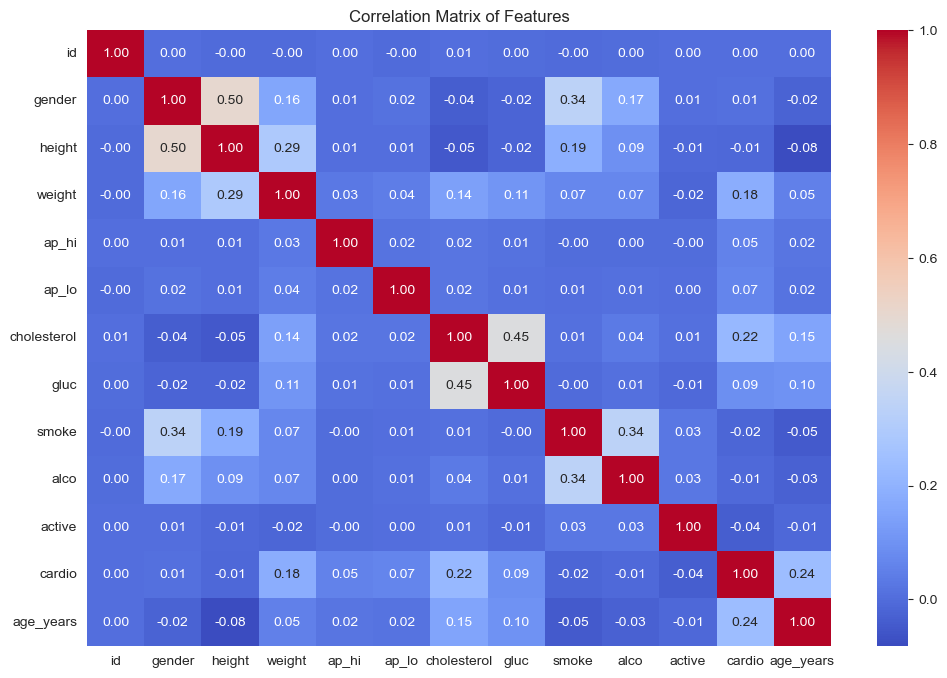

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of Features')
plt.show()

### Analysis: Correlation with Cardiovascular Disease (`cardio`): Heatmap Analysis

| **Feature**   | **Correlation with `cardio`** | **Strength**     | **Interpretation / Comment**                         |
|---------------|-------------------------------|------------------|------------------------------------------------------|
| age / age_years| 0.24                          | moderate         | Older age increases risk of cardiovascular disease   |
| cholesterol   | 0.22                          | moderate         | Higher cholesterol moderately linked to disease      |
| weight        | 0.18                          | weak-moderate    | Higher weight slightly increases risk                |
| ap_hi         | 0.05                          | weak             | Systolic blood pressure has minor effect             |
| ap_lo         | 0.07                          | weak             | Diastolic blood pressure has minor effect            |
| gluc          | 0.09                          | weak             | Higher glucose slightly increases risk               |
| gender        | 0.01                          | none             | Gender has almost no linear effect                   |
| smoke         | -0.02                         | none             | Smoking not correlated (in this dataset)             |
| alco          | -0.04                         | none             | Alcohol not correlated (in this dataset)             |
| active        | -0.04                         | none             | Physical activity not correlated (in this dataset)   |

**Note:**
- The strongest correlations with cardiovascular disease are age, cholesterol, and weight — but even these are only moderate.
- Most other features show weak or no linear relationship, suggesting the need for more complex models to capture interactions.